# ART HopSkipJump Attack

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import imagenet_stubs
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.classifiers import KerasClassifier
from art.attacks import HopSkipJump
from art.utils import to_categorical

# Model Definition

In [3]:
mean_imagenet = np.zeros([224, 224,3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# Get Target and Init Images

Target image is:  105


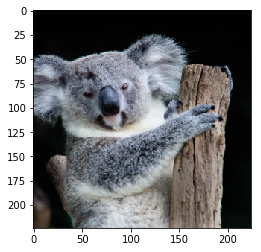

Init image is:  866


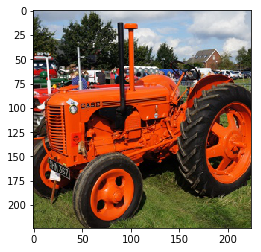

In [4]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

# HopSkipJump Untargeted Attack

Adversarial image at step 0. L2 error 13647.099 and class label 359.


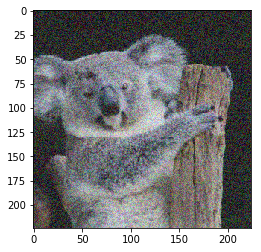

Adversarial image at step 10. L2 error 8133.8066 and class label 678.


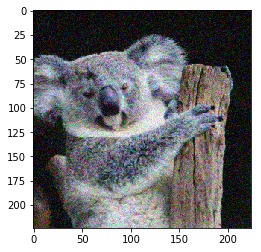

Adversarial image at step 20. L2 error 5621.9834 and class label 678.


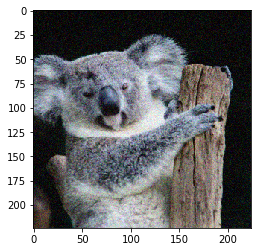

Adversarial image at step 30. L2 error 4176.076 and class label 678.


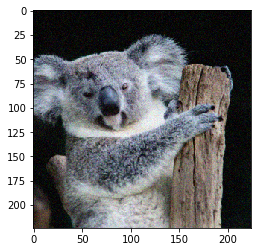

Adversarial image at step 40. L2 error 3398.0361 and class label 678.


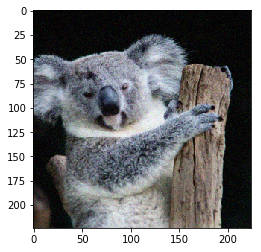

Adversarial image at step 50. L2 error 2814.3296 and class label 678.


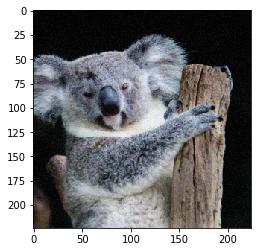

Adversarial image at step 60. L2 error 2460.8232 and class label 678.


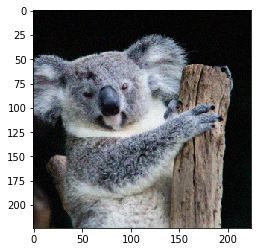

Adversarial image at step 70. L2 error 2142.5703 and class label 678.


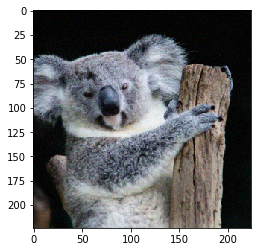

Adversarial image at step 80. L2 error 1900.0353 and class label 678.


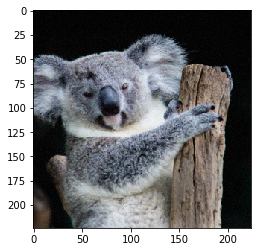

Adversarial image at step 90. L2 error 1709.9285 and class label 678.


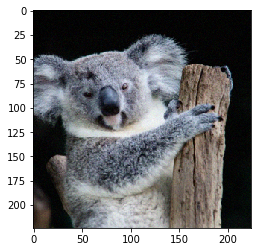

In [5]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None
for i in range(10):
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step

# HopSkipJump Targeted Attack

Adversarial image at step 0. L2 error 44399.297 and class label 866.


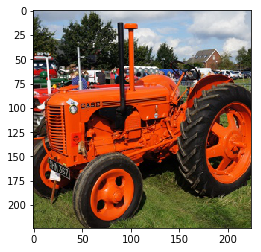

Adversarial image at step 10. L2 error 16262.254 and class label 866.


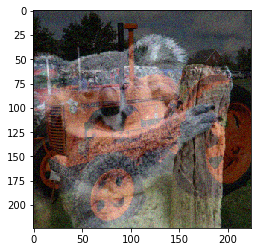

Adversarial image at step 20. L2 error 13485.552 and class label 866.


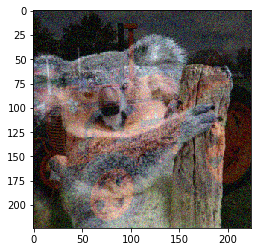

Adversarial image at step 30. L2 error 11112.514 and class label 866.


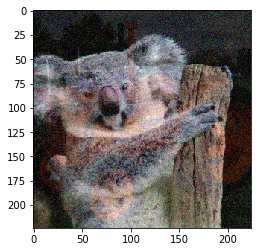

Adversarial image at step 40. L2 error 9519.762 and class label 866.


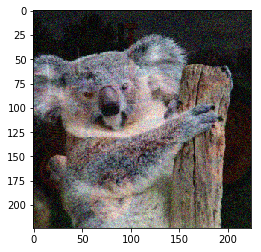

Adversarial image at step 50. L2 error 7850.4185 and class label 866.


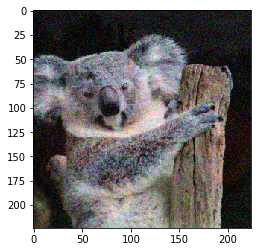

Adversarial image at step 60. L2 error 6700.117 and class label 866.


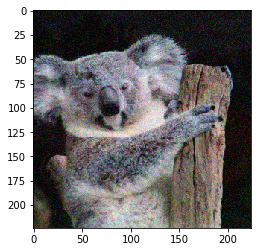

Adversarial image at step 70. L2 error 5938.3164 and class label 866.


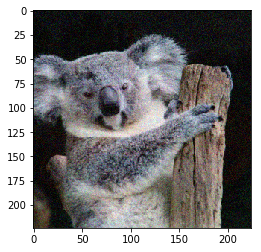

Adversarial image at step 80. L2 error 4980.128 and class label 866.


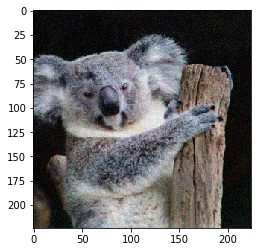

Adversarial image at step 90. L2 error 4239.8887 and class label 866.


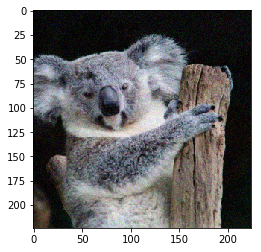

In [6]:
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = np.array([init_image])
for i in range(10):
    x_adv = attack.generate(x=np.array([target_image]), y=to_categorical([866], 1000), x_adv_init=x_adv)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step